## Первая попытка

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

sns.set(rc={'figure.figsize':(20,20)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [2]:
house_prices_df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'boston-house-prices-regression', 'housing.csv'))
house_prices_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# проверка на NaN-ы
for i in house_prices_df.columns:
    if house_prices_df[i].isnull().values.any():
        print(i)
        house_prices_df[i].fillna(house_prices_df[i].mean(), axis=0, inplace=True)

In [4]:
# разделение на train и test
train, test = np.split(house_prices_df.sample(frac=1), [int(0.8*len(house_prices_df))])

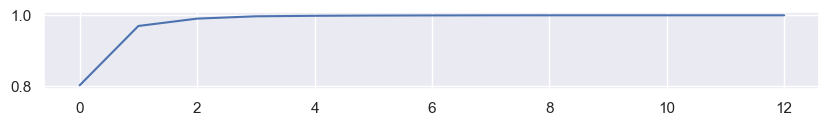

In [5]:
# количество признаков, необходимых для описания дисперсии данных
sample = train.drop('MEDV', axis=1)
pca_sample = PCA()
sample = pca_sample.fit_transform(sample)
plt.figure(figsize=(10,1))
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [6]:
# StandardScaler и PCA
def preprocessing(df):
    x = df.drop('MEDV', axis=1)
    y = df['MEDV']
    sc = StandardScaler()
    sc.fit_transform(x)
    #pca = PCA(n_components=8)
    #x = pca.fit_transform(x)
    return x, y

In [7]:
# обучение моделей
X_train, Y_train = preprocessing(train)
X_test, Y_test = preprocessing(test)

model_0 = KNeighborsRegressor()
model_0.fit(X_train, Y_train)

model_1 = SVR()
model_1.fit(X_train, Y_train)

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, Y_train)


DecisionTreeRegressor()

In [8]:
print(
    f'Точность {model_0} составляет {mean_squared_error(Y_test, model_0.predict(X_test))}\n'
    f'Точность {model_1} составляет {mean_squared_error(Y_test, model_1.predict(X_test))}\n'
    f'Точность {model_2} составляет {mean_squared_error(Y_test, model_2.predict(X_test))}\n'
)

Точность KNeighborsRegressor() составляет 35.28729803921569
Точность SVR() составляет 57.137990661195204
Точность DecisionTreeRegressor() составляет 13.059117647058823

